<a href="https://colab.research.google.com/github/TVLlam/1771020412_CNTT17-01_TRAN_VAN_LAM/blob/master/CNTT17_01_B%C3%99I_%C4%90%E1%BB%A8C_TH%E1%BA%AENG_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dữ liệu ban đầu:
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2              2           4     Credit Card   
1    TXN_4977031    Cake        4              3          12            Cash   
2    TXN_4271903  Cookie        4              1       ERROR     Credit Card   
3    TXN_7034554   Salad        2              5          10         UNKNOWN   
4    TXN_3160411  Coffee        2              2           4  Digital Wallet   

   Location Transaction Date  
0  Takeaway         9/8/2023  
1  In-store        5/16/2023  
2  In-store        7/19/2023  
3   UNKNOWN        4/27/2023  
4  In-store        6/11/2023  
Dữ liệu sau khi làm sạch:
  Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373    Coffee       2.0             2.0          4.0   
1    TXN_4977031      Cake       4.0             3.0         12.0   
3    TXN_7034554     Salad       2.0             5.0         10.0   
4    TXN_31604

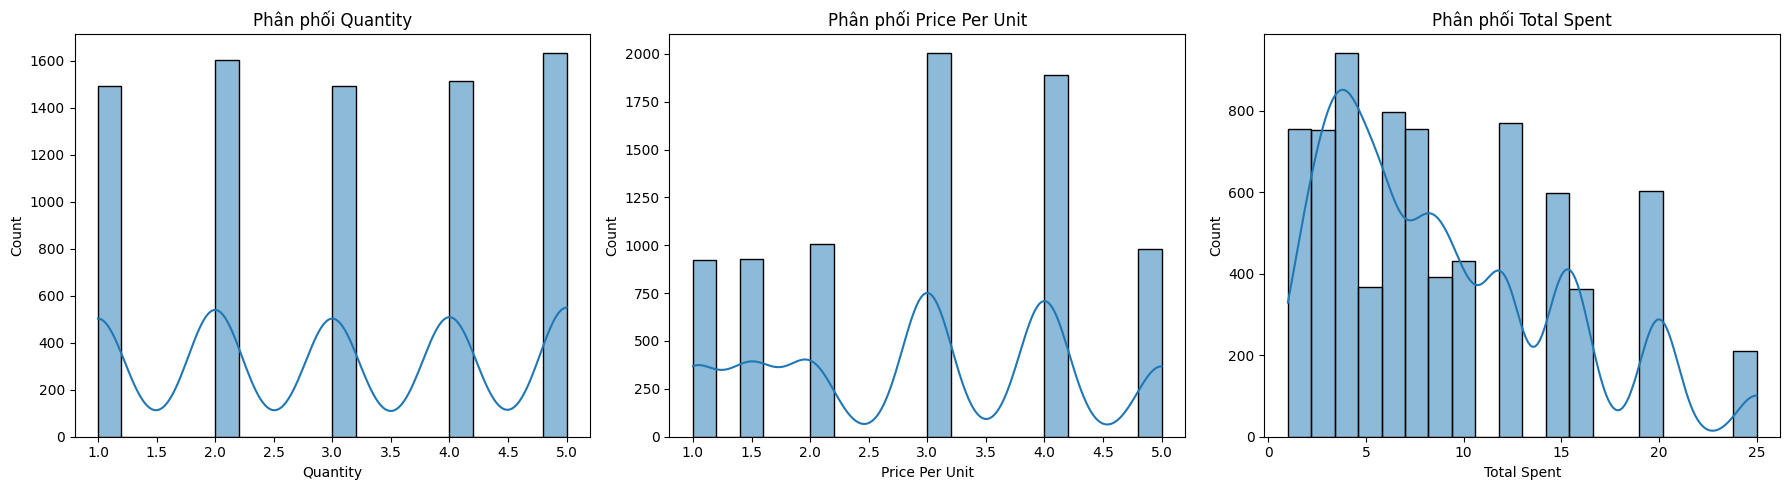

Xây dựng mô hình...
Kết quả đánh giá mô hình:
Mean Absolute Error: 1.2610097923233576
Mean Squared Error: 3.1683777960329746
R2 Score: 0.9079616502717706
Hệ số của mô hình: [2.95852321 3.01566793]
Intercept: -8.901481108197565


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Bước 1: Thu thập dữ liệu
file_path = "/content/drive/MyDrive/XSTK/CNTT17-01_BÙI ĐỨC THẮNG_BKT2.csv"
df = pd.read_csv(file_path)

# Xuất dữ liệu ban đầu chưa làm sạch
df.to_csv("raw_data.csv", index=False)
print("Dữ liệu ban đầu:")
print(df.head())

# Bước 2: Làm sạch dữ liệu
# Chuyển đổi các cột số về dạng numeric
for col in ['Quantity', 'Price Per Unit', 'Total Spent']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Thay thế giá trị lỗi, không xác định bằng NaN
df.replace(["UNKNOWN", "ERROR"], pd.NA, inplace=True)

# Loại bỏ các dòng có dữ liệu thiếu quan trọng
df_cleaned = df.dropna(subset=['Item', 'Quantity', 'Price Per Unit', 'Total Spent'])

# Xuất dữ liệu sau khi làm sạch
df_cleaned.to_csv("cleaned_data.csv", index=False)
print("Dữ liệu sau khi làm sạch:")
print(df_cleaned.head())

# Bước 3: Phân tích dữ liệu khám phá (EDA)
summary_stats = df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']].describe()
print("Thống kê mô tả:")
print(summary_stats)

# Vẽ biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_cleaned['Quantity'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Phân phối Quantity')

sns.histplot(df_cleaned['Price Per Unit'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Phân phối Price Per Unit')

sns.histplot(df_cleaned['Total Spent'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Phân phối Total Spent')

plt.tight_layout()
plt.show()

# Bước 4: Xây dựng mô hình dự đoán Total Spent dựa trên Quantity và Price Per Unit
print("Xây dựng mô hình...")
X = df_cleaned[['Quantity', 'Price Per Unit']]
y = df_cleaned['Total Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Bước 5: Phân tích kết quả
print("Kết quả đánh giá mô hình:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Hiển thị hệ số của mô hình
print("Hệ số của mô hình:", model.coef_)
print("Intercept:", model.intercept_)
